In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Above code is importing necessary modules for the exercise.

In [2]:
gdp_df = pd.read_csv("..\data\gdp_percapita.csv")
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


Above code is importing the appropriate .csv where '..' symbolizes the need to move up in the file structure to search for the needed file. 

Code below is finding the layout of the DataFrame where the first number represents number of rows and the second represents number of columns. 

In [3]:
gdp_df.shape

(7176, 4)

#### How many rows and columns are in `gdp_df`? What are the data types of each column?

7176 rows and 4 columns.

In [4]:
gdp_df = gdp_df.drop(columns = ["Value Footnotes"])

Above code is dropping the "Value Footnotes" column.

In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_capita']

In [6]:
gdp_df

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


Above code is renaming the columns and displaying the new DataFrame

In [7]:
years = set(list(gdp_df.Year))
print(years)
len(years)

{1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}


31

Above code creates a set of all unique years in the DataFrame and the count of values in the set.

In [8]:
year_counts = gdp_df.Country.value_counts()

Above code starts the structuring of a new DataFrame indicating year counts.

In [9]:
year_counts = year_counts.to_frame()

In [10]:
year_counts = year_counts.reset_index()

In [11]:
year_counts.columns = ['country', 'year_count']

Above code finishes organizing and re-labeling new DataFrame 'year_counts'

In [12]:
missing_year_mask = year_counts['year_count'] != len(years)

Above code creates the mask to filter countries that aren't present in every year.

In [13]:
missing_years = year_counts[missing_year_mask]
print('Countries missing data for all years', missing_years.country.count())

Countries missing data for all years 37


Above code masks the year_counts DataFrame to countries with a year_count not equal to 31 and returns the count of countries in the list.

In [14]:
print("Countries with complete data:", year_counts.country.count() - missing_years.country.count())

Countries with complete data: 205


Above code block subtracts the years missing data from the total count of countries in the data set.

In [15]:
print("Years present in the data:", len(years))

Years present in the data: 31


Above code block counts the number of years present in a previously created set of all years.

In [16]:
missing_years

,country,year_count
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


#### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

37 countries are missing data, 205 countries have data for all 31 years in the data. 

The majority of countries have entries for all years. It seems that the countries missing data were not a part of the UN during a portion of the dataset. 

In [17]:
mask_2020 = gdp_df['Year'] == 2020

Creating a mask for information in the year 2020.

In [18]:
gdp2020_df = gdp_df[mask_2020]
gdp2020_df

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [19]:
type(gdp2020_df)

pandas.core.frame.DataFrame

Masking the gdp_df DataFrame to display just the year 2020, checking data type.

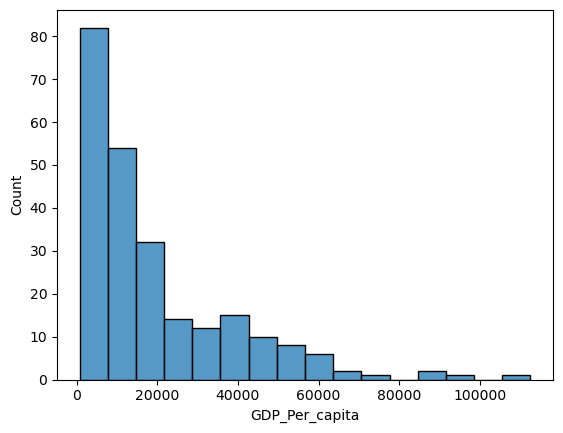

In [20]:
sns.histplot(data=gdp2020_df, x="GDP_Per_capita")
plt.show()

Plotting a histogram for 2020 GDP_Per_capita.

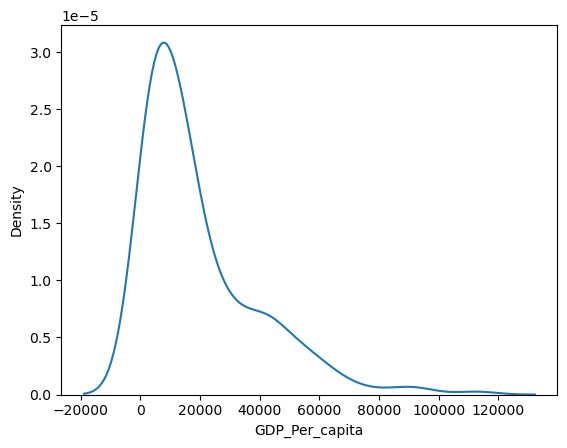

In [21]:
sns.kdeplot(gdp2020_df['GDP_Per_capita'])
plt.show()

Plotting a density plot for 2020 GDP_Per_capita.

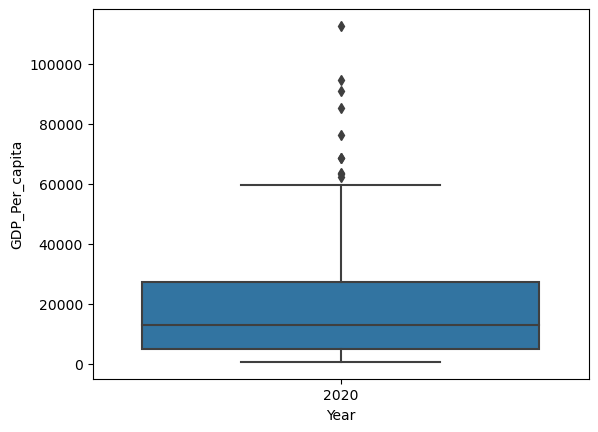

In [22]:
sns.boxplot( x=gdp2020_df["Year"], y=gdp2020_df["GDP_Per_capita"] )
plt.show()

Creating boxplot for 2020 GDP_Per_capita

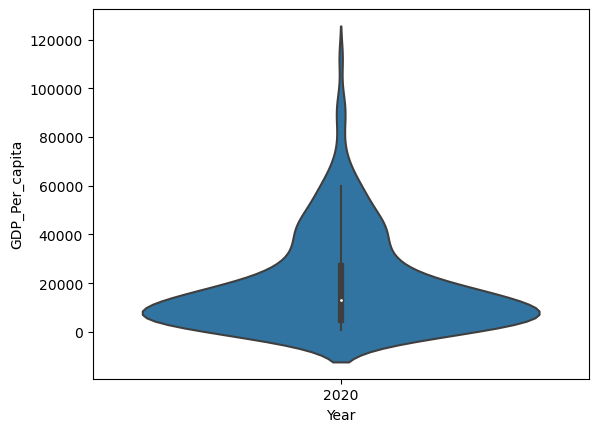

In [23]:
sns.violinplot( x=gdp2020_df["Year"], y=gdp2020_df["GDP_Per_capita"] )
plt.show()

Creating a violin plot for 2020 GDP_Per_capita

#### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Boxplot and histogram do not show negative values by default.Density plot shows lists the density of the variable instead of the count or visual representation of the count. 

In [24]:
print("The median GDP_Per_capita for 2020 is", gdp2020_df.GDP_Per_capita.median())

The median GDP_Per_capita for 2020 is 12908.9374056206


#### 9. What was the median GDP per capita value in 2020?

The median gdp value in 2020 is 12908.9374056206.

In [53]:
gdp_decades = gdp_df[(gdp_df.Year == 2020) | (gdp_df.Year == 2010) | (gdp_df.Year == 2000) | (gdp_df.Year == 1990)]


Above code subsets the gdp_df DataFrame to a new frame called gdp_decades using the | operator to signify the 'or' condition. 

When filtering for multiple conditions:

| = or, & = and, ~ = not 

In [55]:
gdp_decades

,Country,Year,GDP_Per_capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576
